# Exercise 1 #
Use the Wine dataset from sklearn and run a classification model. Do a `GridSearchCV` for hyperparameters with cross-validation.
- load with `sklearn.datasets.load_wine()`
- explore the variables
- split dataset into train+test
- use a `RandomForestClassifier`
- define a hyperparameter grid with, for example, n_estimators, max_depth, criterion
- use GridSearchCV with 5-fold cross-validation to find the best hyperparameter combination
- train the model with the best combination
- evaluate performance with accuracy, precision, recall, F1-score (in classification report)
- report the confusion matrix
- discuss results and feature importance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

sns.set_theme(style="whitegrid")

In [2]:
data = load_wine()
x = data.data
y = data.target

In [3]:
print(x.shape, y.shape)

(178, 13) (178,)


In [11]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [12]:
df = pd.DataFrame(x,columns=data.feature_names)
df['class'] = y

In [13]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [14]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [16]:
model = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 3, 5], 'criterion': ['gini', 'entropy'], 'max_features': [None, 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best parameter combination:", grid_search.best_params_)

Best parameter combination: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}


In [19]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print(f'Accuracy = {100*accuracy_score(y_test, y_pred):.2f}%')

print(f'Classification report:\n{classification_report(y_test, y_pred)}')

print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy = 100.00%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion matrix:
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


In [25]:
importances = best_model.feature_importances_
print(importances)

[0.15002567 0.01966289 0.01271208 0.03204364 0.03123582 0.03566264
 0.2332843  0.00612194 0.03639495 0.16827227 0.07557048 0.09605803
 0.10295529]


In [22]:
feature_importances = pd.DataFrame({'feature': data.feature_names,'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importances)

                         feature  importance
6                     flavanoids    0.233284
9                color_intensity    0.168272
0                        alcohol    0.150026
12                       proline    0.102955
11  od280/od315_of_diluted_wines    0.096058
10                           hue    0.075570
8                proanthocyanins    0.036395
5                  total_phenols    0.035663
3              alcalinity_of_ash    0.032044
4                      magnesium    0.031236
1                     malic_acid    0.019663
2                            ash    0.012712
7           nonflavanoid_phenols    0.006122


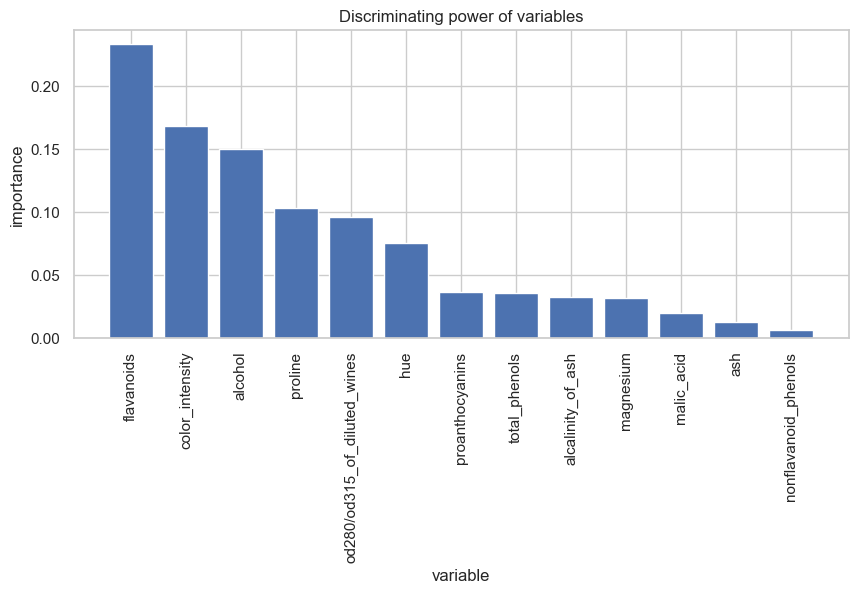

In [24]:
plt.figure(figsize=(10, 4))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.yticks()
plt.xlim()
plt.ylim()
plt.title("Discriminating power of variables")
plt.xlabel("variable")
plt.ylabel("importance")
plt.show()